In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense
from keras import optimizers
from keras import regularizers
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from IPython.display import clear_output
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

clear_output()

In [47]:
df = pd.read_pickle('data/saeb_treated.pkl')
df.head()

,ano,sigla_uf,escola_publica,id_aluno,situacao_censo,disciplina,proficiencia,erro_padrao,proficiencia_saeb,erro_padrao_saeb,...,correcao_licao_casa_0,correcao_licao_casa_1,correcao_licao_casa_2,correcao_licao_casa_3,correcao_licao_casa_4,utiliza_biblioteca_escola_0,utiliza_biblioteca_escola_1,utiliza_biblioteca_escola_2,utiliza_biblioteca_escola_3,utiliza_biblioteca_escola_4
274,2015,PB,1,17518688,0,MT,-0.472096,0.538400,223.577837,30.092429,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
348,2015,PB,1,17518163,0,MT,-0.809452,0.580177,204.722224,32.427443,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
408,2015,PB,1,17491526,0,LP,-0.828752,0.366511,204.326255,20.192323,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
417,2015,PB,1,17523365,0,LP,-0.564052,0.351783,218.909469,19.380908,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1008,2015,PB,1,17508044,0,LP,-0.775107,0.449797,207.281739,24.780829,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [48]:
df = df.dropna(subset=['desempenho_aluno_cat'])
print(df.shape)

(133774, 83)


In [49]:
df = df[df['disciplina'] == 'MT']

In [50]:
print(df.columns)

Index(['ano', 'sigla_uf', 'escola_publica', 'id_aluno', 'situacao_censo',
       'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'desempenho_aluno', 'sexo', 'raca_cor',
       'ano_nascimento', 'idade', 'mae_sabe_ler_escrever', 'mae_le',
       'pai_sabe_ler_escrever', 'pai_le',
       'responsaveis_incentivam_realizacao_licao_casa',
       'responsaveis_incentivam_estudos', 'responsaveis_incentivam_leitura',
       'responsaveis_incentivam_comparecer_aulas', 'leitura_jornais',
       'leitura_livros_geral', 'leitura_literatura_infantojuvenil',
       'leitura_historia_quadrinhos', 'leitura_revista_comportamento',
       'leitura_revistas_geral', 'leitura_internet', 'frequenta_biblioteca',
       'frequenta_cinema', 'frequenta_espetaculo_exposicao',
       'frequenta_festas_comunidade', 'gosta_estudar_disciplina', 'rede',
       'id_escola', 'serie', 'turno', 'desempenho_aluno_cat',
       'escolaridade_mae_0', 'escolaridade_mae_1', 'escolar

In [51]:
exclude = ['ano', 'sigla_uf', 'id_aluno', 'situacao_censo', 'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'desempenho_aluno', 'sexo', 'raca_cor','ano_nascimento', 'rede', 'id_escola', 'serie', 'turno']

In [52]:
df['escola_publica'] = df['escola_publica'].astype('int64')
df['escola_publica'].dtype

dtype('int64')

In [53]:
df['mae_le'].dtype

dtype('int64')

In [54]:
# print unique values for each column excluding exclude columns
for col in df.columns:
    if col not in exclude:
        print(col, df[col].unique())

escola_publica [1 0]
idade [15 18 17 16 14 13]
mae_sabe_ler_escrever [1 0]
mae_le [1 0]
pai_sabe_ler_escrever [1 0]
pai_le [1 0]
responsaveis_incentivam_realizacao_licao_casa [ 0. nan  1.]
responsaveis_incentivam_estudos [ 0. nan  1.]
responsaveis_incentivam_leitura [ 0.  1. nan]
responsaveis_incentivam_comparecer_aulas [ 0. nan  1.]
leitura_jornais [ 1.  0. nan]
leitura_livros_geral [ 1.  0. nan]
leitura_literatura_infantojuvenil [ 1.  0. nan]
leitura_historia_quadrinhos [ 1. nan  0.]
leitura_revista_comportamento [ 1. nan  0.]
leitura_revistas_geral [ 1.  0. nan]
leitura_internet [ 0.  1. nan]
frequenta_biblioteca [ 1.  0. nan]
frequenta_cinema [ 1.  0. nan]
frequenta_espetaculo_exposicao [ 1. nan  0.]
frequenta_festas_comunidade [ 1.  0. nan]
gosta_estudar_disciplina [ 0.  1. nan]
desempenho_aluno_cat [0 1 2 3]
escolaridade_mae_0 [0. 1.]
escolaridade_mae_1 [1. 0.]
escolaridade_mae_2 [0. 1.]
escolaridade_mae_3 [0. 1.]
escolaridade_mae_4 [0. 1.]
escolaridade_mae_5 [0. 1.]
escolaridade

Filtering unimportant columns

In [55]:
# colunas:
# idade, leitura_jornais, leitura_revista_comportamento,
# escolaridade_mae_0, escolaridade_mae_1, escolaridade_mae_4, escolaridade_mae_5, escolaridade_mae_6
# escolaridade_pai_0, escolaridade_pai_4, escolaridade_pai_5
# possui_computador_0, possui_computador_1, possui_computador_2
# mae_sabe_ler_escrever, pai_sabe_ler_escrever

# conjunto 1:
# idade, frequenta_espetaculo_exposicao, frequenta_festas_comunidade, frequenta_biblioteca
# tempo_lazer, gosta_estudar_disciplina, faz_licao_casa, correcao_licao_casa, utiliza_biblioteca_escola

# conjunto 2:
# idade, leitura_jornais, leitura_revista_comportamento, mae_sabe_ler_escrever, pai_sabe_ler_escrever
# frequenta_biblioteca, utiliza_biblioteca_escola

# conjunto 3:
# idade, escolaridade_mae_0, escolaridade_mae_1, escolaridade_mae_4, escolaridade_mae_5, escolaridade_mae_6
# escolaridade_pai_0, escolaridade_pai_4, escolaridade_pai_5, mae_sabe_ler_escrever, pai_sabe_ler_escrever

# conjunto 4:
# idade, faz_licao_casa, correcao_licao_casa, utiliza_biblioteca_escola, gosta_estudar_disciplina

# conjunto 5:
# idade, possui_computador_0, possui_computador_1, possui_computador_2, mae_sabe_ler_escrever, pai_sabe_ler_escrever
# gosta_estudar_disciplina, faz_licao_casa, correcao_licao_casa

In [56]:
df.columns

Index(['ano', 'sigla_uf', 'escola_publica', 'id_aluno', 'situacao_censo',
       'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'desempenho_aluno', 'sexo', 'raca_cor',
       'ano_nascimento', 'idade', 'mae_sabe_ler_escrever', 'mae_le',
       'pai_sabe_ler_escrever', 'pai_le',
       'responsaveis_incentivam_realizacao_licao_casa',
       'responsaveis_incentivam_estudos', 'responsaveis_incentivam_leitura',
       'responsaveis_incentivam_comparecer_aulas', 'leitura_jornais',
       'leitura_livros_geral', 'leitura_literatura_infantojuvenil',
       'leitura_historia_quadrinhos', 'leitura_revista_comportamento',
       'leitura_revistas_geral', 'leitura_internet', 'frequenta_biblioteca',
       'frequenta_cinema', 'frequenta_espetaculo_exposicao',
       'frequenta_festas_comunidade', 'gosta_estudar_disciplina', 'rede',
       'id_escola', 'serie', 'turno', 'desempenho_aluno_cat',
       'escolaridade_mae_0', 'escolaridade_mae_1', 'escolar

In [57]:
df['rede'].value_counts()

rede
1    37403
0    27728
2     1756
Name: count, dtype: int64

In [58]:
df['turno'].value_counts()

turno
0    35624
1    30567
2      696
Name: count, dtype: int64

In [59]:
df['desempenho_aluno'].value_counts() # estão desbalanceados

desempenho_aluno
Básico          33972
Insuficiente    27368
Proficiente      4962
Avançado          585
Name: count, dtype: int64

In [60]:
_df = df.dropna()

In [61]:
# aplicando smote
from imblearn.combine import SMOTEENN
features = ['frequenta_espetaculo_exposicao', 'frequenta_festas_comunidade', 'frequenta_biblioteca', 'gosta_estudar_disciplina']
features += [col for col in _df.columns if 'tempo_lazer' in col]
features += [col for col in _df.columns if 'faz_licao_casa' in col]
features += [col for col in _df.columns if 'correcao_licao_casa' in col]
features += [col for col in _df.columns if 'utiliza_biblioteca_escola' in col]

X = _df[features]

y = _df['desempenho_aluno_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

# Verificar a distribuição das classes após o balanceamento
print(y_resampled.value_counts())

desempenho_aluno_cat
3    5190
1    4429
0    1998
2    1025
Name: count, dtype: int64


In [62]:
_df.drop(columns=exclude + ['desempenho_aluno', 'desempenho_aluno_cat']).columns

Index(['escola_publica', 'idade', 'mae_sabe_ler_escrever', 'mae_le',
       'pai_sabe_ler_escrever', 'pai_le',
       'responsaveis_incentivam_realizacao_licao_casa',
       'responsaveis_incentivam_estudos', 'responsaveis_incentivam_leitura',
       'responsaveis_incentivam_comparecer_aulas', 'leitura_jornais',
       'leitura_livros_geral', 'leitura_literatura_infantojuvenil',
       'leitura_historia_quadrinhos', 'leitura_revista_comportamento',
       'leitura_revistas_geral', 'leitura_internet', 'frequenta_biblioteca',
       'frequenta_cinema', 'frequenta_espetaculo_exposicao',
       'frequenta_festas_comunidade', 'gosta_estudar_disciplina',
       'escolaridade_mae_0', 'escolaridade_mae_1', 'escolaridade_mae_2',
       'escolaridade_mae_3', 'escolaridade_mae_4', 'escolaridade_mae_5',
       'escolaridade_mae_6', 'escolaridade_mae_7', 'escolaridade_pai_0',
       'escolaridade_pai_1', 'escolaridade_pai_2', 'escolaridade_pai_3',
       'escolaridade_pai_4', 'escolaridade_pai_5', 

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
import numpy as np

X = _df.drop(columns=exclude + ['desempenho_aluno', 'desempenho_aluno_cat'])
y = _df['desempenho_aluno_cat']

cv = StratifiedKFold(n_splits=5)

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    sm = SMOTE(random_state=42)
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_oversampled, y_train_oversampled)
    
    y_pred = model.predict(X_test)
    
    print(f'For fold {fold}:')
    print(f'Accuracy: {model.score(X_test, y_test)}')
    print(f'f-score: {f1_score(y_test, y_pred, average="weighted")}')

For fold 1:
Accuracy: 0.5163688824769725
f-score: 0.5003915980779275
For fold 2:
Accuracy: 0.5216957052491399
f-score: 0.49473411337948797
For fold 3:
Accuracy: 0.5120976692563818
f-score: 0.4526014853333508
For fold 4:
Accuracy: 0.5221975582685905
f-score: 0.4860069717558783
For fold 5:
Accuracy: 0.5269700332963374
f-score: 0.5075362238504038


In [64]:
# treinar o modelo

print(X_resampled.shape, y_resampled.shape)

model = Sequential()
model.add(Dense(8, input_dim=X_resampled.shape[1], activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))

# desempenho_aluno_cat has 4 classes
model.add(Dense(4, activation='softmax'))

model.summary()

# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

(12642, 25) (12642,)


/home/erlo/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 388 (1.52 KB)

 Trainable params: 388 (1.52 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
history = model.fit(X_resampled, y_resampled, epochs=100, batch_size=48)

Epoch 1/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - accuracy: 0.4421 - loss: 1.3733
Epoch 2/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.5237 - loss: 1.0250
Epoch 3/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - accuracy: 0.6294 - loss: 0.9134
Epoch 4/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.6696 - loss: 0.8415
Epoch 5/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.6898 - loss: 0.8091
Epoch 6/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - accuracy: 0.7075 - loss: 0.7701
Epoch 7/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.7157 - loss: 0.7619
Epoch 8/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - accuracy: 0.7195 - loss: 0.7522
Epoch 9/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - accuracy: 0.7179 - loss: 0.7459
Epoch 10/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.7269 - loss: 0.7248
Epoch 11/100
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step - accuracy: 0.7312 - loss: 0.7117
Epoch 12/100
264/26

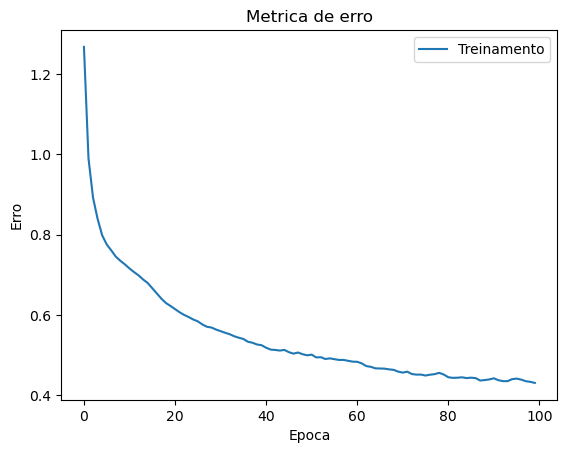

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 25, but received input with shape (32, 65)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 65), dtype=float32)
  • training=False
  • mask=None

In [67]:
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

# Obtendo a acuracia usando accuracy_score()
pred = np.round(model.predict(X_resampled))
acc_train = accuracy_score(y_train, pred)

# Obtendo a acuracia usando evaluate()
E_out, acc_test = model.evaluate(X_test, y_test, batch_size=48, verbose=0)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (teste): {acc_test:.4f}')
print(f"--> E_out - E_in = {E_out - history.history['loss'][-1]:.4f}")
print(f"--> acc_train - acc_test = {acc_train - acc_test:.4f}")

In [27]:
# conjunto 2
X = df[['leitura_jornais', 'leitura_revista_comportamento', 'mae_sabe_ler_escrever', 'pai_sabe_ler_escrever',
        'frequenta_biblioteca', 'utiliza_biblioteca_escola']]
y = df['desempenho_aluno_cat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# aplicando smote
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

model = Sequential()
model.add(Dense(4, input_dim=X.shape[1], activation='relu'))
model.add(Dense(4, activation='relu'))

# desempenho_aluno_cat has 4 classes
model.add(Dense(4, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

model.summary()

# compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/home/erlo/miniconda3/envs/aprendizagem/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 4)              │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68 (272.00 B)

 Trainable params: 68 (272.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(X_train, y_train, epochs=100, batch_size=48, validation_data=(X_val, y_val), callbacks=[es])

Epoch 1/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4165 - loss: 1.2068 - val_accuracy: 0.5101 - val_loss: 0.9605
Epoch 2/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5095 - loss: 0.9499 - val_accuracy: 0.5101 - val_loss: 0.9505
Epoch 3/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5076 - loss: 0.9469 - val_accuracy: 0.5101 - val_loss: 0.9498
Epoch 4/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5073 - loss: 0.9466 - val_accuracy: 0.5101 - val_loss: 0.9500
Epoch 5/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5074 - loss: 0.9449 - val_accuracy: 0.5101 - val_loss: 0.9499
Epoch 6/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5073 - loss: 0.9420 - val_accuracy: 0.5101 - val_loss: 0.9499
Epoch 7/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5077 - loss: 0.9452 - val_accuracy: 0.5101 - val_loss: 0.9499
Epoch 8/100
892/892 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5031 - loss: 0.9463 - val_accu